In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
train=pd.read_excel('D:/Inuron/Internships/Flight_Fare_Prediction/notebooks/data/Data_train.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test=pd.read_excel('D:/Inuron/Internships/Flight_Fare_Prediction/notebooks/data/Test_set.xlsx')

In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
#testing null values
print("null values in test: ",test.isnull().sum())

print('\n'*3)
print("null values in train: ",train.isnull().sum())

null values in test:  Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64




null values in train:  Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [9]:
print('Train shape: ',train.shape)
print('\n')
print('Test shape:',test.shape)

Train shape:  (10683, 11)


Test shape: (2671, 10)


In [10]:
train[train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
train[train['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
train=train.dropna()

In [13]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
categorical_columns=train.select_dtypes(include='object').columns
numerical_columns=train.select_dtypes(exclude='object').columns

In [15]:
categorical_columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [16]:
numerical_columns

Index(['Price'], dtype='object')

In [17]:
train['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [18]:
train['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [19]:
train['Date_of_Journey']=pd.to_datetime(train['Date_of_Journey'])

C:\Users\ARUN KUMAR V\AppData\Local\Temp\ipykernel_4752\505770925.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train['Date_of_Journey']=pd.to_datetime(train['Date_of_Journey'])


In [20]:
train['Date_of_Journey'].dtype

dtype('<M8[ns]')

In [21]:
train['Date_of_Journey'].head()

0   2019-03-24
1   2019-05-01
2   2019-06-09
3   2019-05-12
4   2019-03-01
Name: Date_of_Journey, dtype: datetime64[ns]

In [22]:
train['Journey_date']=train['Date_of_Journey'].dt.day

In [23]:
train['Journey_year']=train['Date_of_Journey'].dt.year

train['Journey_month']=train['Date_of_Journey'].dt.month

In [24]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_year,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,2019,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,2019,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,2019,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,2019,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,2019,3


In [25]:
duration_train=list(train['Duration'])
duration_train

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [26]:
for i in range(len(duration_train)):
    if len(duration_train[i].split())!=2:
        if "h" in duration_train[i]:
            duration_train[i]=duration_train[i].strip()+' 0m'
        else:
            duration_train[i]='0h '+duration_train[i]

In [27]:
duration_hours=[]
duration_mins=[]
for i in range(len(duration_train)):
    duration_hours.append(int(duration_train[i].split(sep='h')[0]))
    duration_mins.append(int(duration_train[i].split(sep="m")[0].split()[-1]))

In [28]:
train['Duration_hrs']=duration_hours
train['Duration_hrs']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hrs, Length: 10682, dtype: int64

In [29]:
train['Duration_min']=duration_mins
train['Duration_min']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_min, Length: 10682, dtype: int64

In [30]:
train['Dep_hr']=pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_min']=pd.to_datetime(train['Dep_Time']).dt.minute
train.drop('Dep_Time',axis=1,inplace=True)

C:\Users\ARUN KUMAR V\AppData\Local\Temp\ipykernel_4752\4023867001.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Dep_hr']=pd.to_datetime(train['Dep_Time']).dt.hour
C:\Users\ARUN KUMAR V\AppData\Local\Temp\ipykernel_4752\4023867001.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Dep_min']=pd.to_datetime(train['Dep_Time']).dt.minute


In [31]:
train['Arrival_Time'].head()

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [32]:
train['Arrival_hr']=pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_min']=pd.to_datetime(train['Arrival_Time']).dt.minute
train.drop("Arrival_Time",axis=1,inplace=True)

C:\Users\ARUN KUMAR V\AppData\Local\Temp\ipykernel_4752\199732823.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Arrival_hr']=pd.to_datetime(train['Arrival_Time']).dt.hour
C:\Users\ARUN KUMAR V\AppData\Local\Temp\ipykernel_4752\199732823.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Arrival_min']=pd.to_datetime(train['Arrival_Time']).dt.minute


In [33]:
train.shape

(10682, 18)

In [34]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_year,Journey_month,Duration_hrs,Duration_min,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,2019,3,2,50,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,7,25,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,2019,6,19,0,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,2019,5,5,25,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,2019,3,4,45,16,50,21,35


In [35]:
train.drop('Date_of_Journey',axis=1,inplace=True)
train.drop('Duration',axis=1,inplace=True)

In [36]:
categorical_columns=train.select_dtypes(include='object').columns

In [37]:
categorical_columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [38]:
Airline=train[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True,dtype=int)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [39]:
Source=train[['Source']]
Source=pd.get_dummies(Source,drop_first=True,dtype=int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [40]:
Destination=train[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True,dtype=int)


In [41]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [42]:
train=pd.concat([train,Airline,Source,Destination],axis=1)
train=train.drop(['Airline','Source','Destination','Additional_Info','Route'],axis=1)

In [43]:
train['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [44]:
train=train.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [45]:
train.shape

(10682, 31)

In [46]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_year', 'Journey_month',
       'Duration_hrs', 'Duration_min', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [47]:
train=train.loc[:,~train.columns.duplicated()]

In [48]:
train.to_csv('train.csv',index=False)

<Axes: >

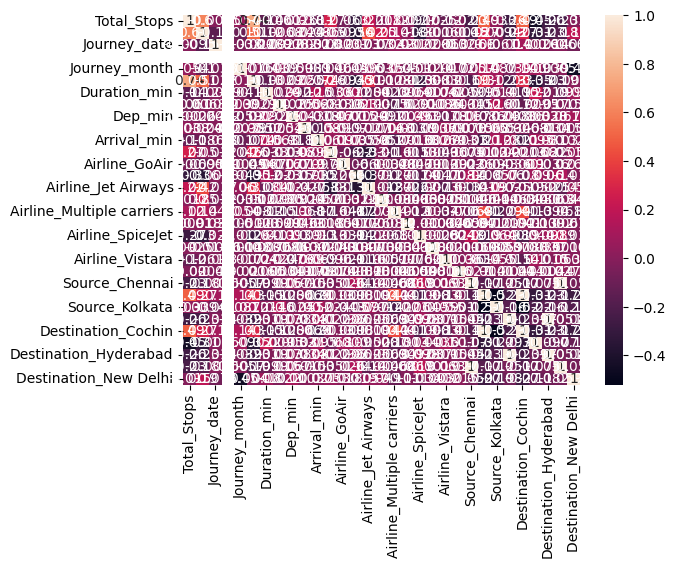

In [49]:
sns.heatmap(data=train.corr(),annot=True)

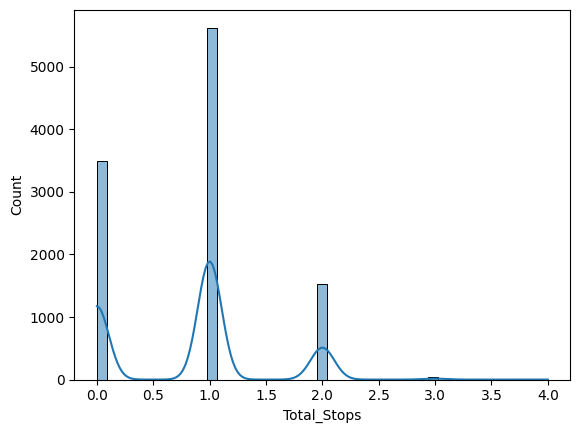

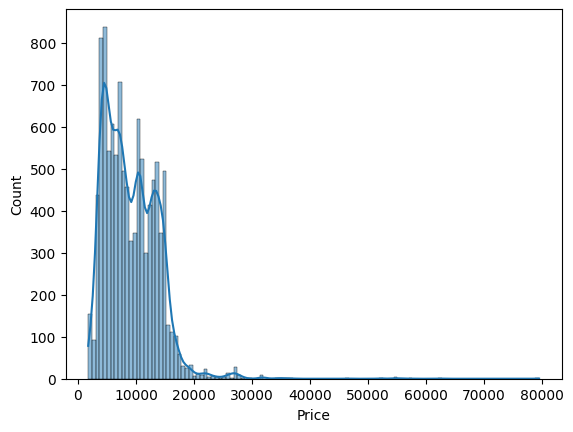

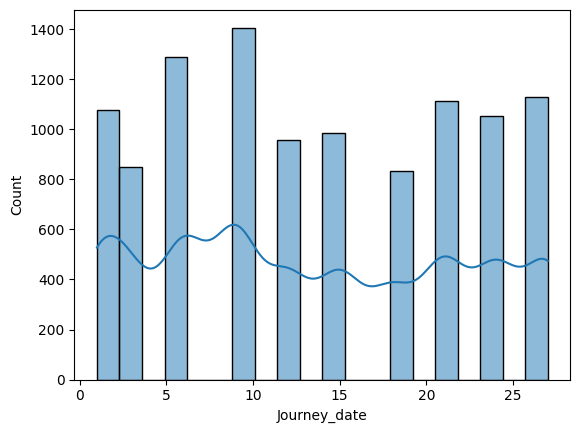

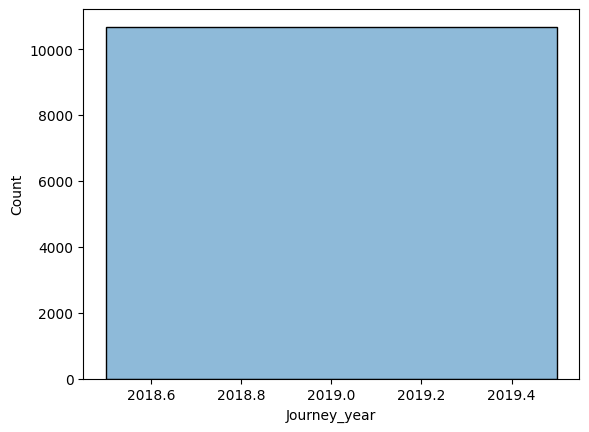

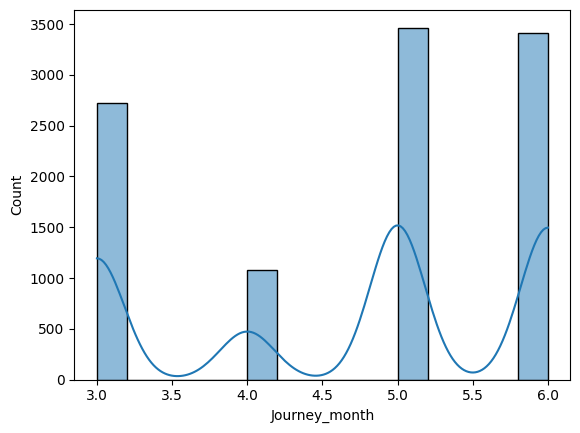

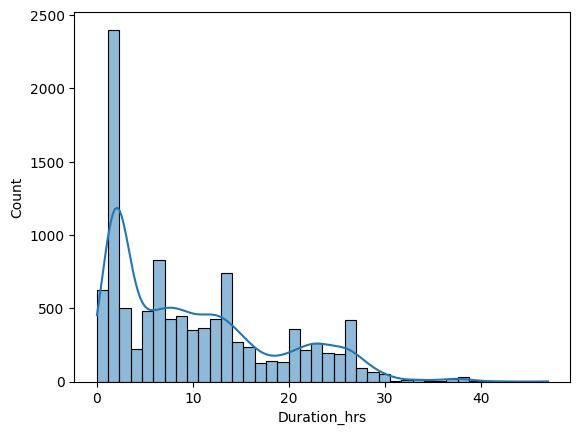

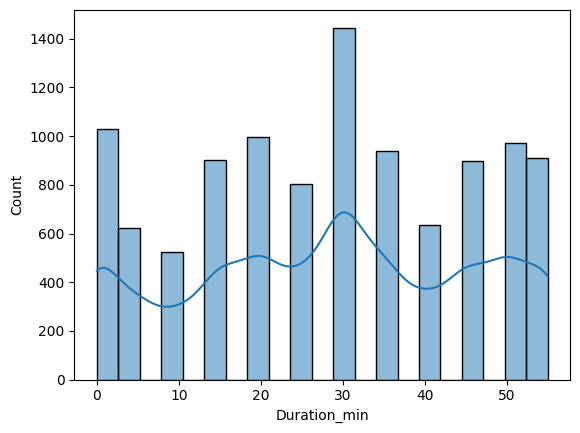

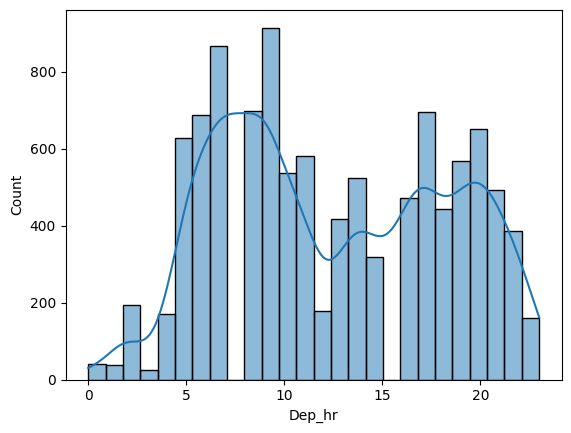

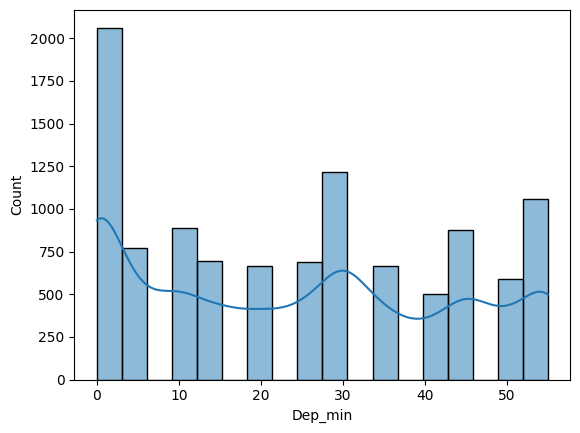

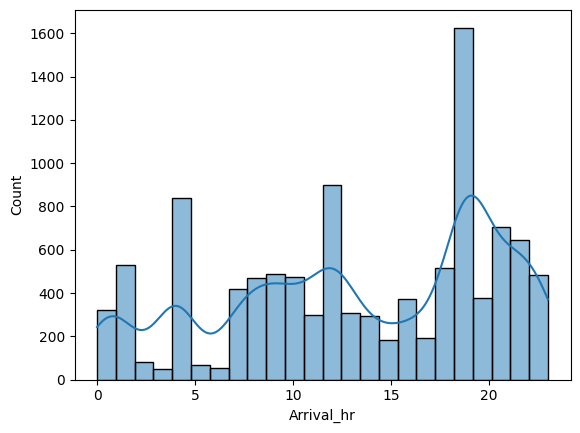

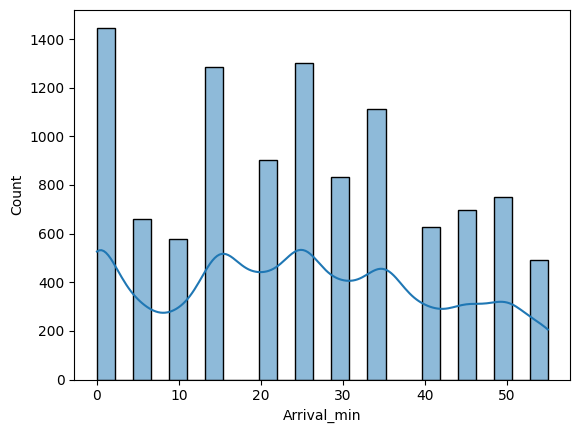

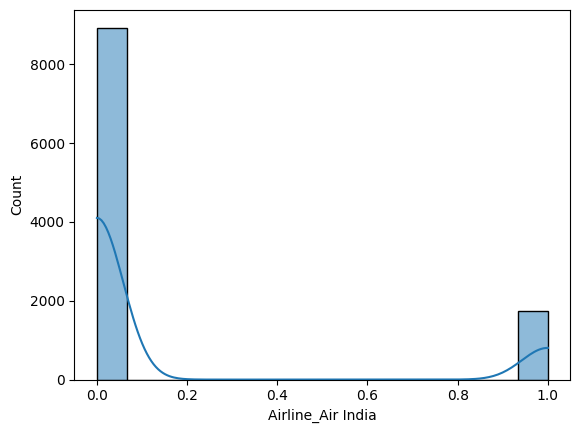

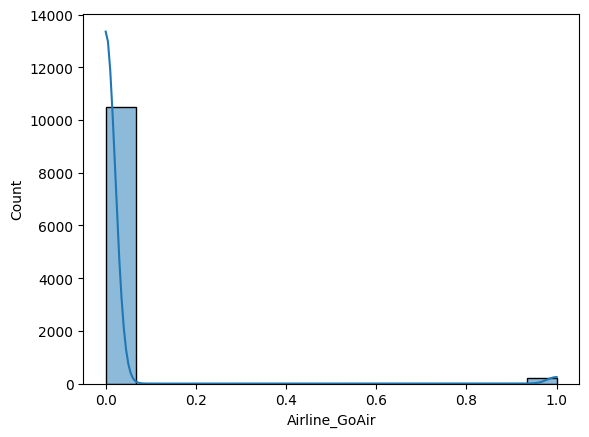

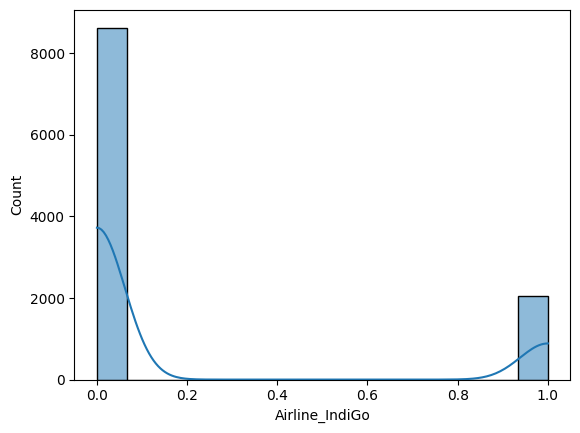

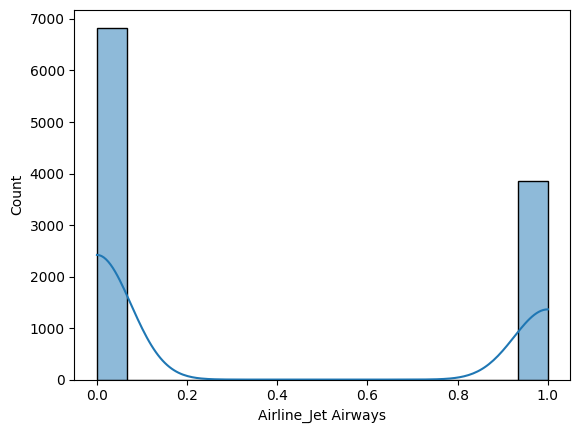

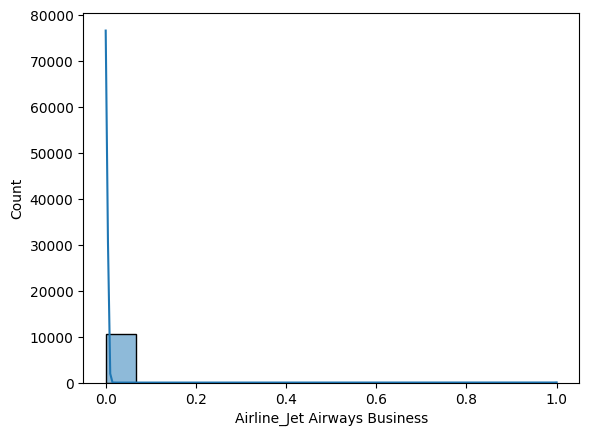

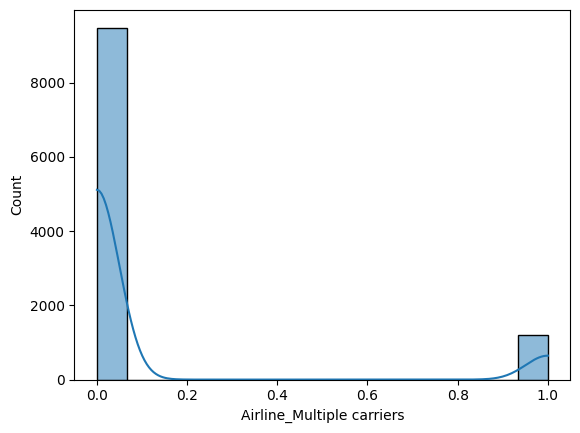

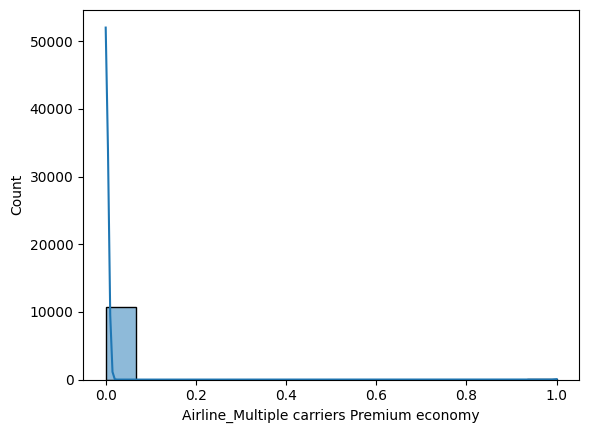

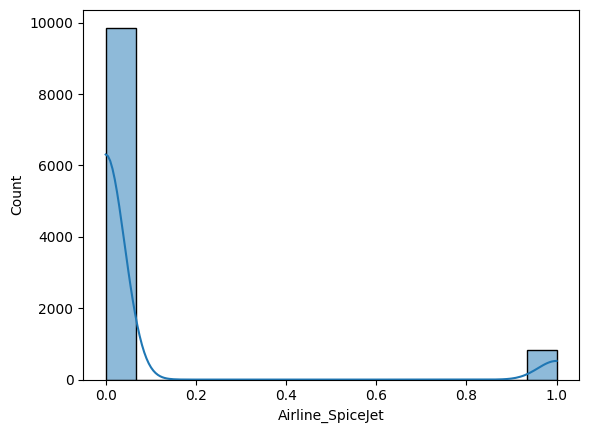

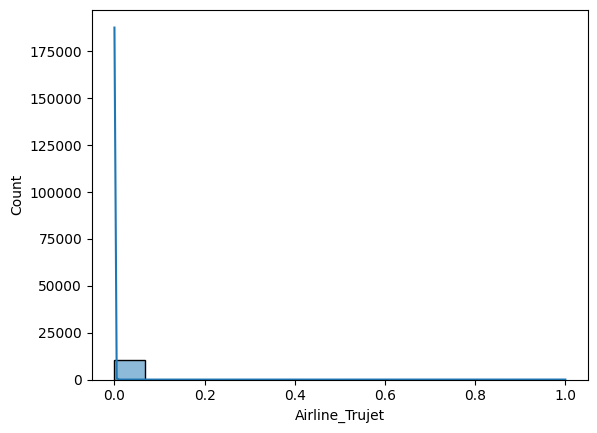

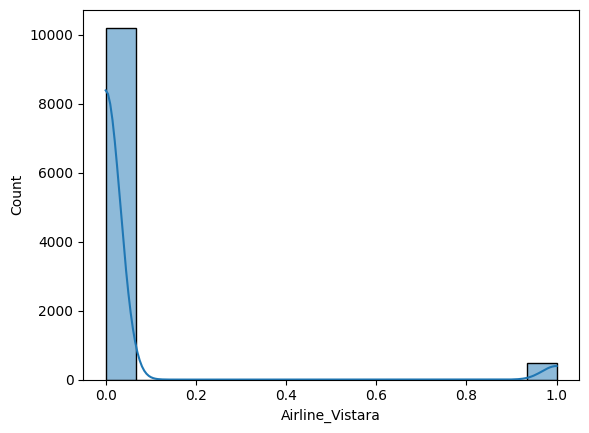

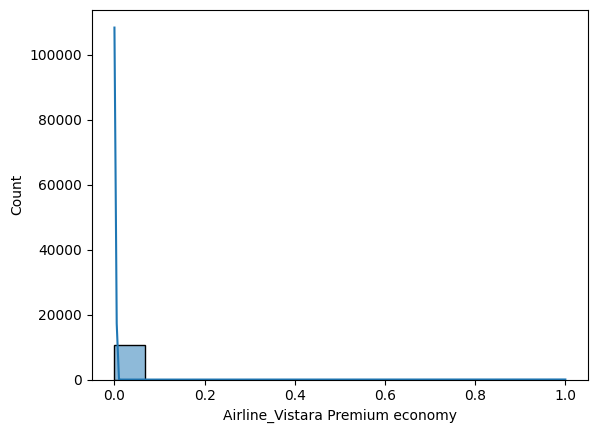

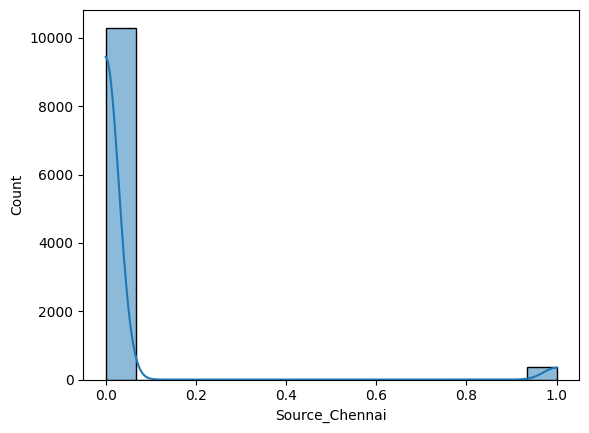

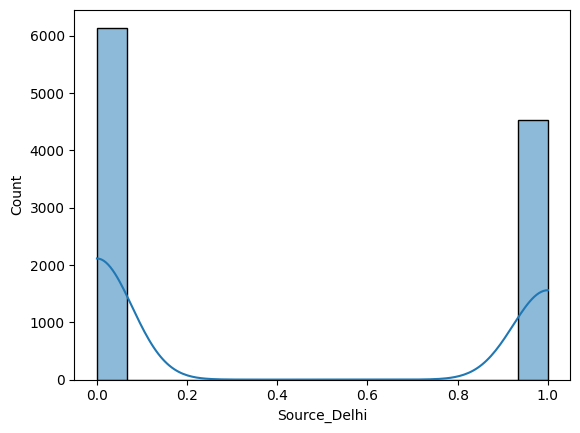

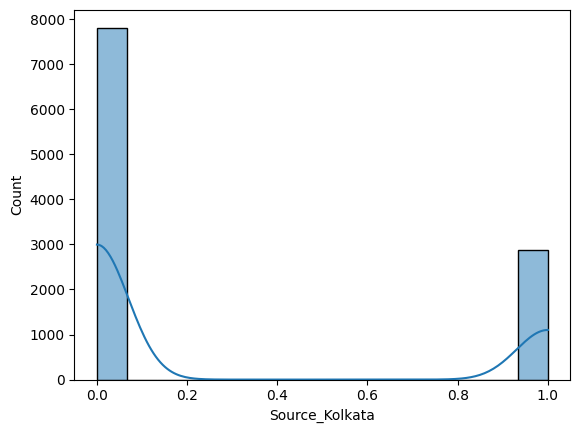

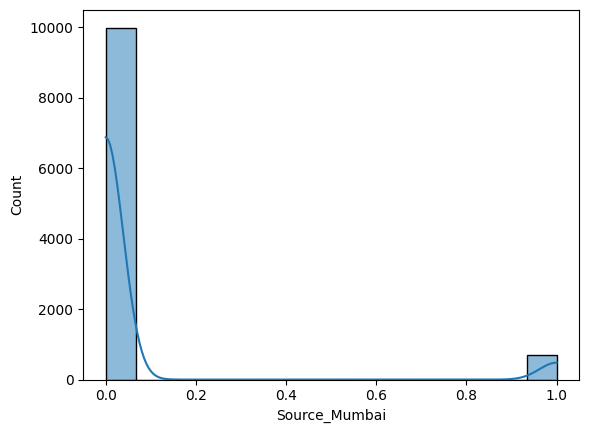

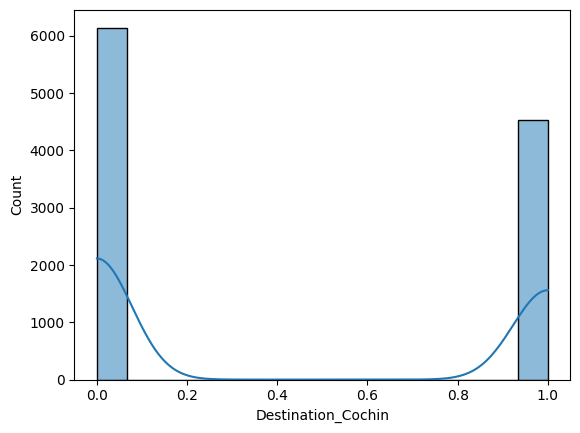

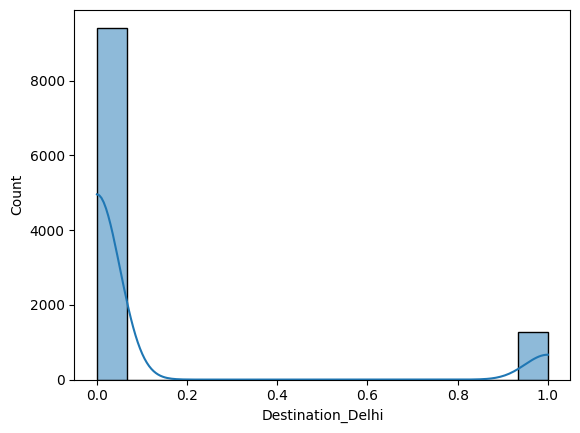

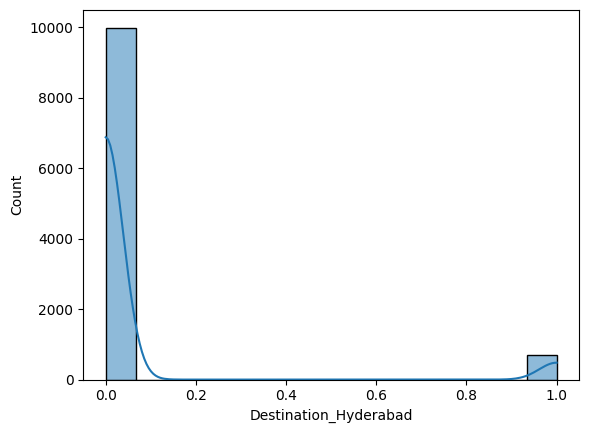

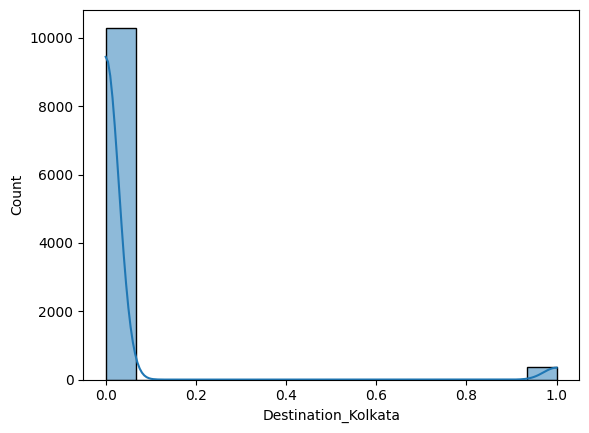

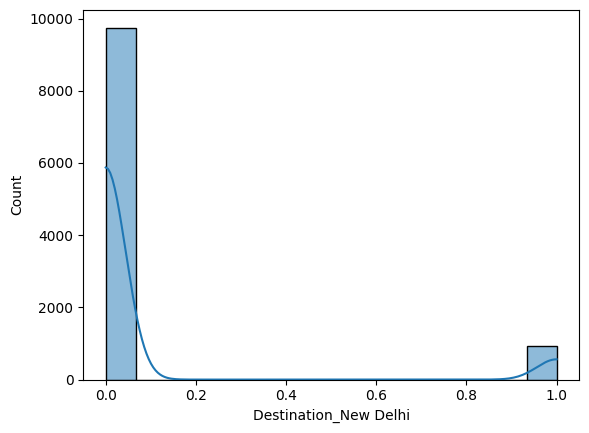

In [50]:
x=0
for i in train.columns:
    sns.histplot(data=train,x=i,kde=True)
    print('\n')
    plt.show()

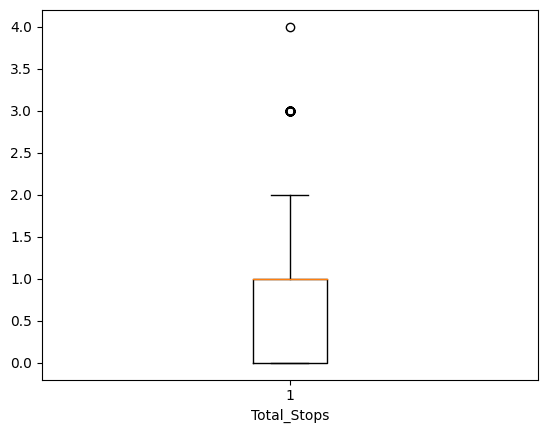

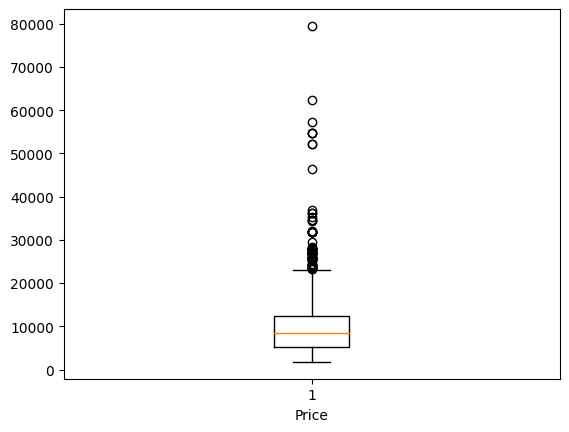

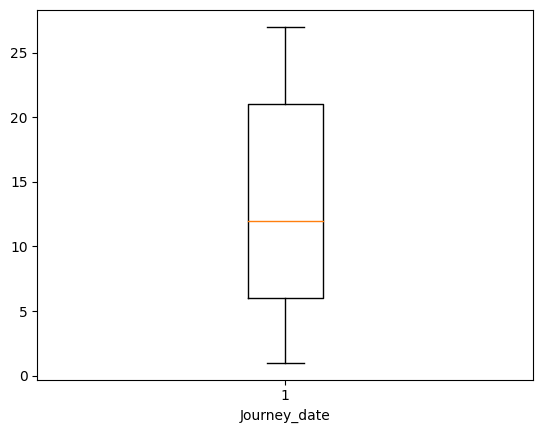

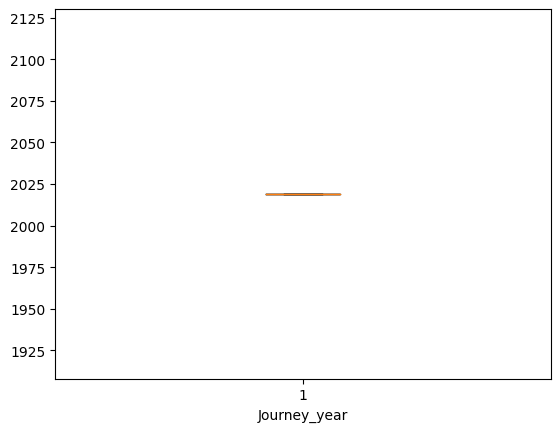

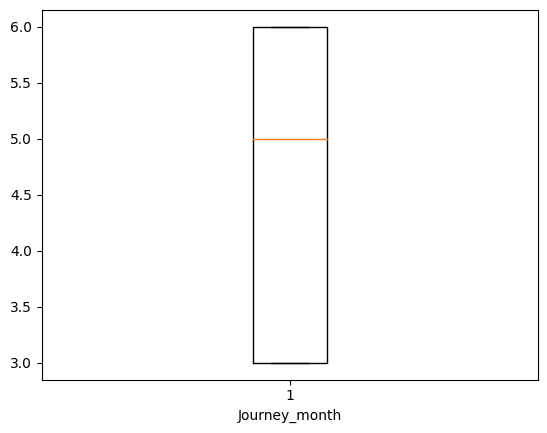

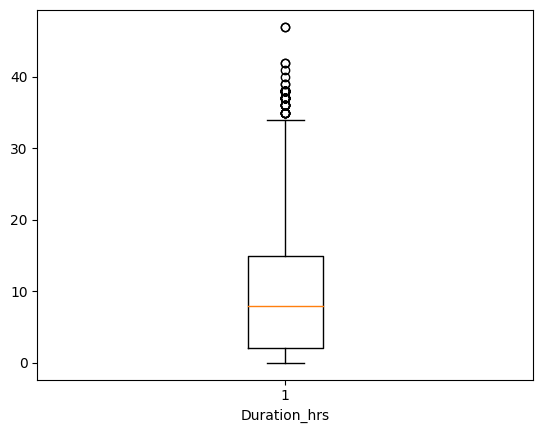

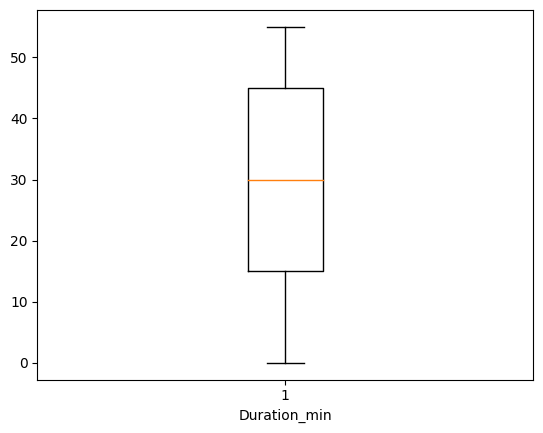

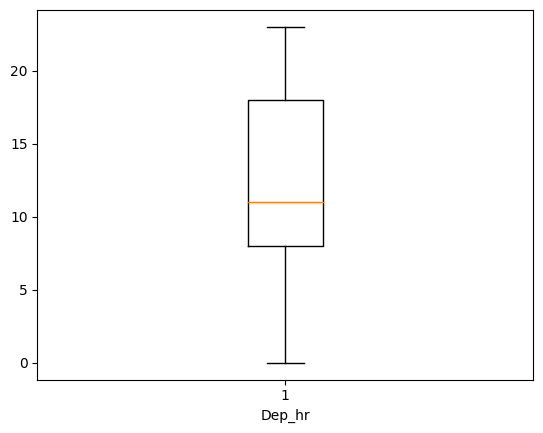

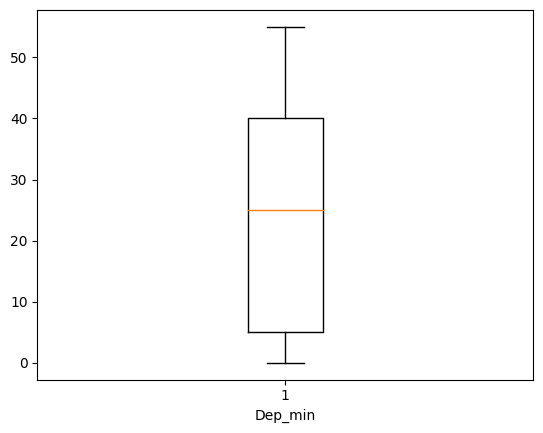

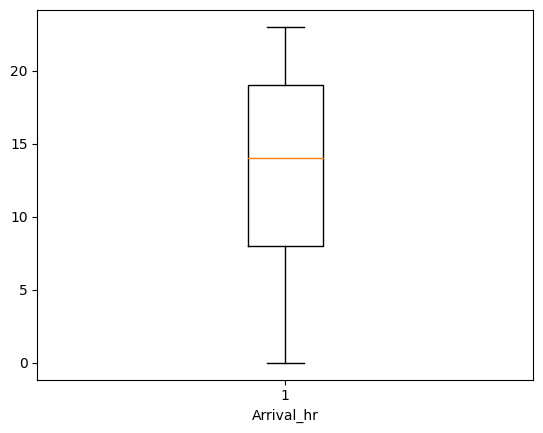

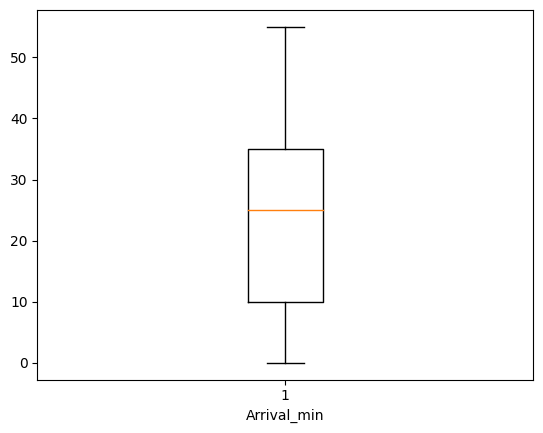

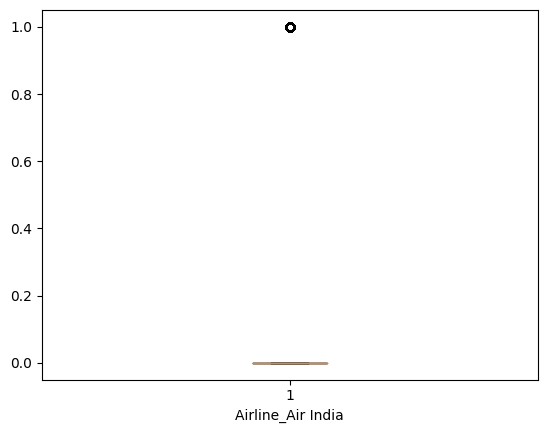

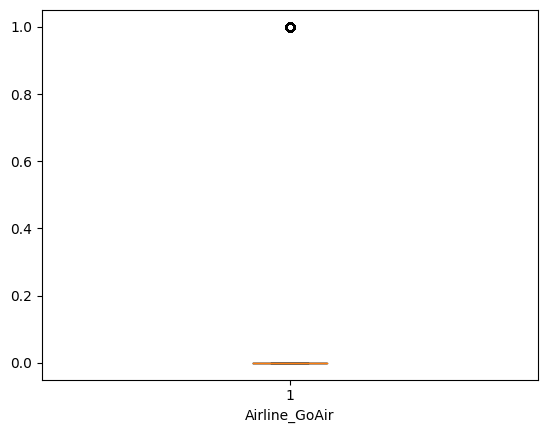

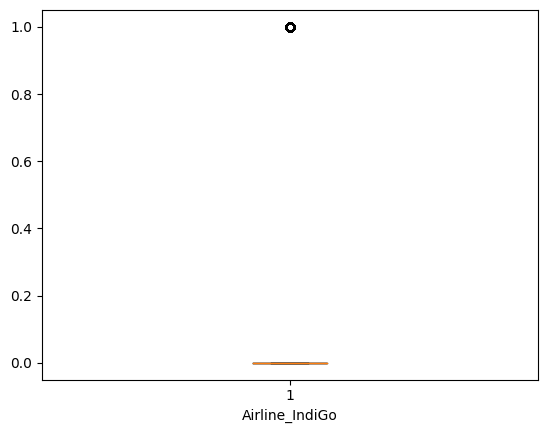

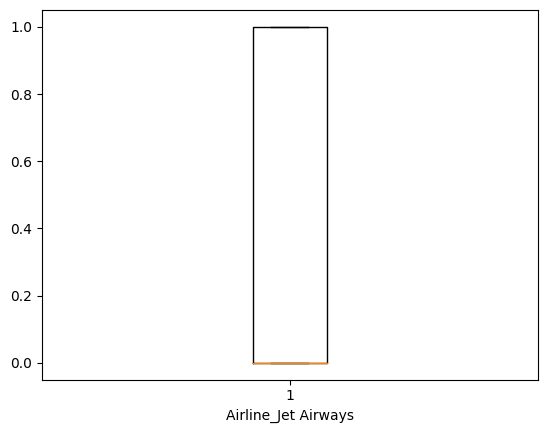

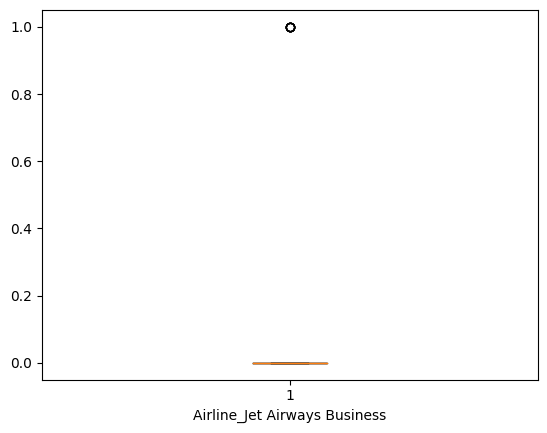

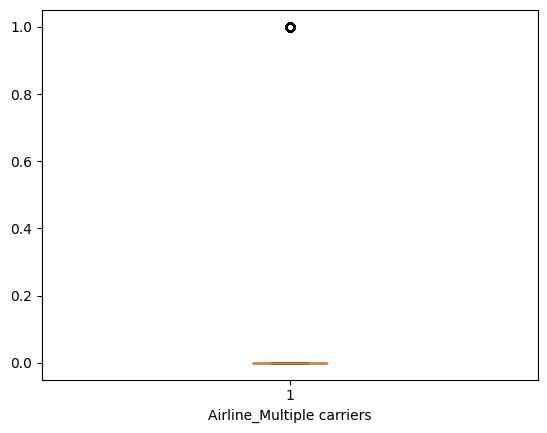

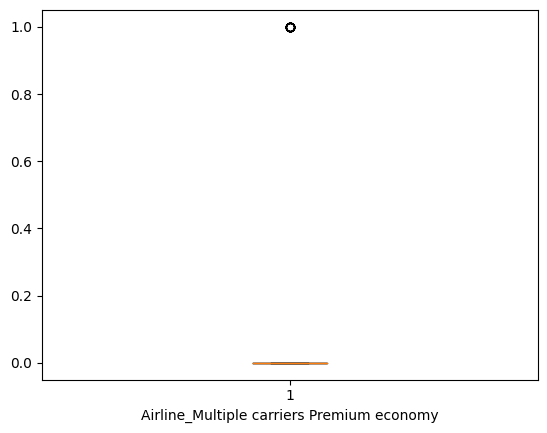

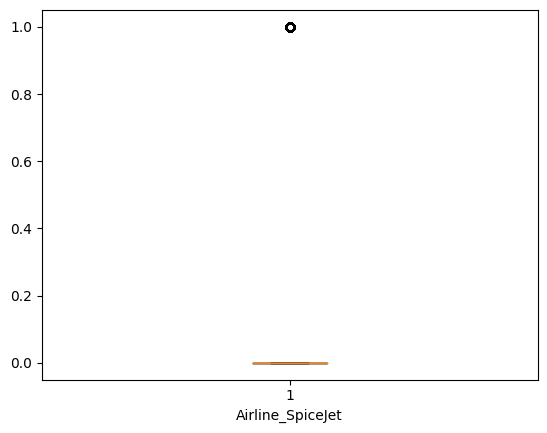

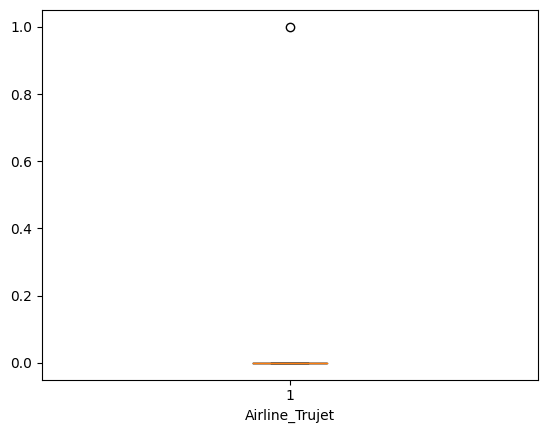

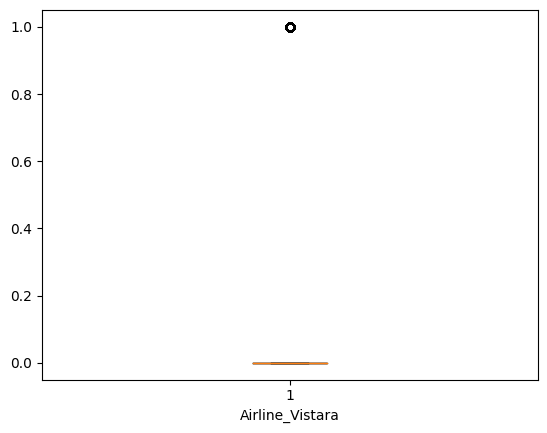

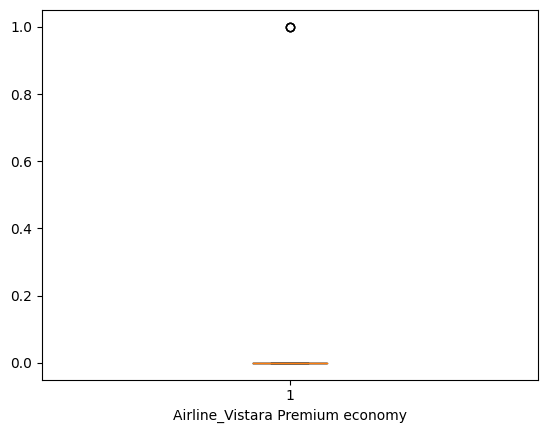

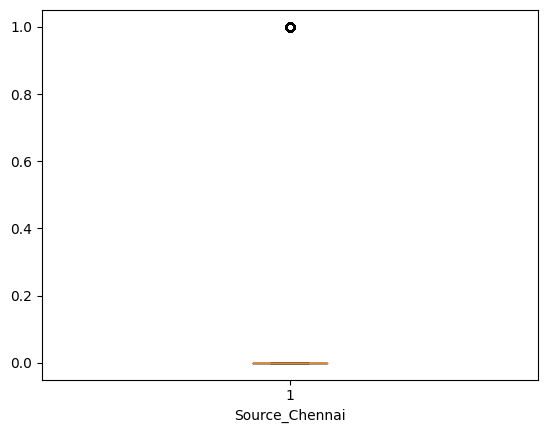

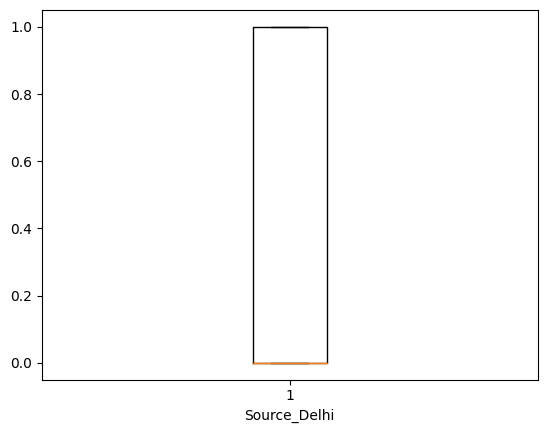

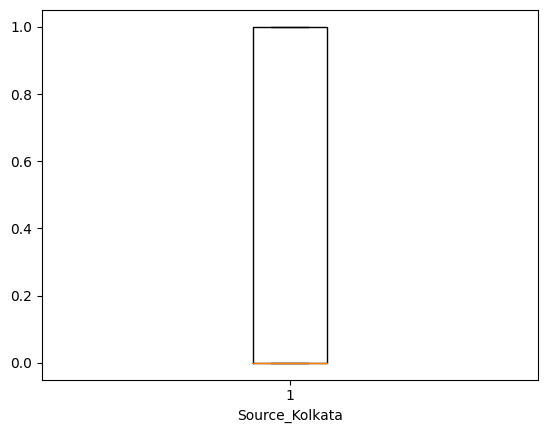

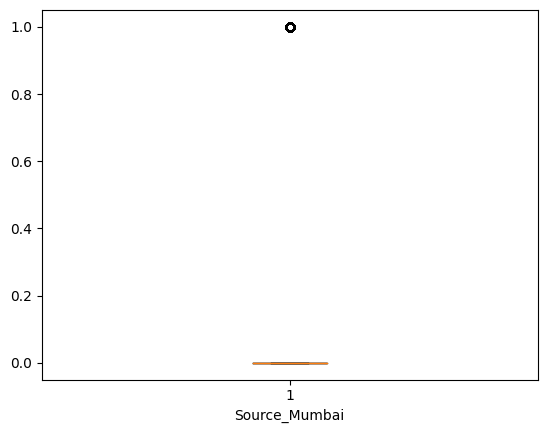

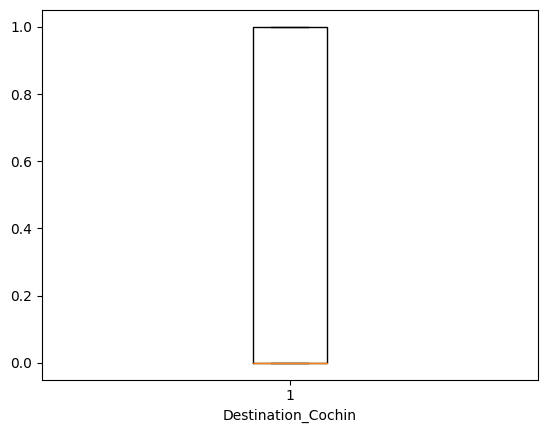

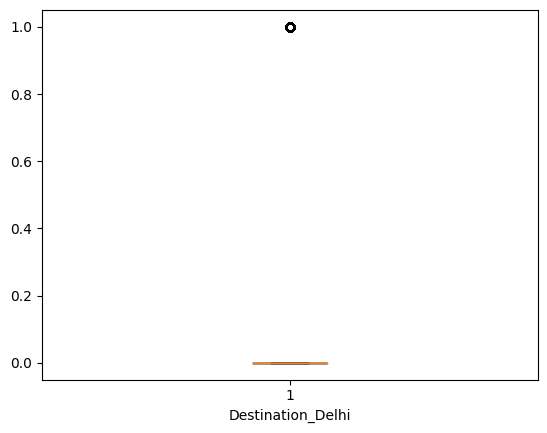

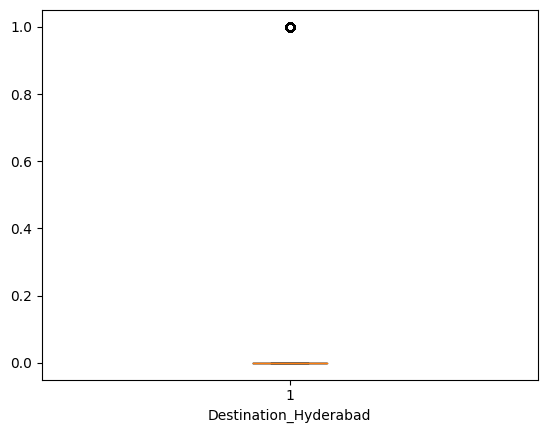

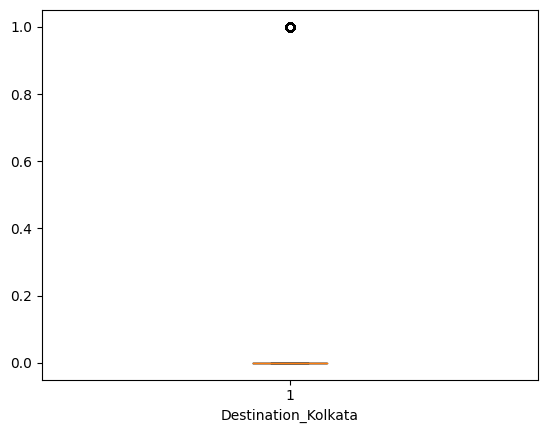

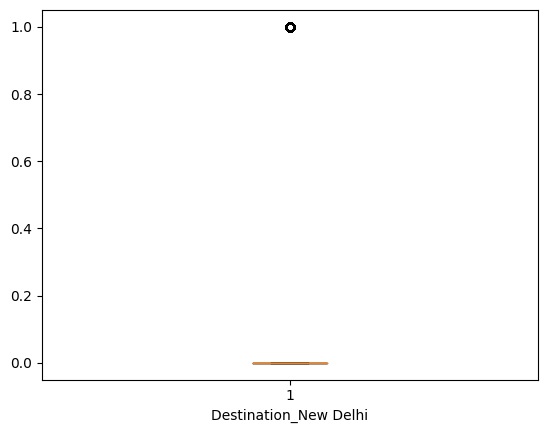

In [51]:
x=0
for i in train.columns:
    plt.boxplot(x=i,data=train)
    plt.xlabel(i)
    print('\n')
    plt.show()

In [52]:
train.shape

(10682, 31)

In [53]:
train.describe()

,Total_Stops,Price,Journey_date,Journey_year,Journey_month,Duration_hrs,Duration_min,Dep_hr,Dep_min,Arrival_hr,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,2019.0,4.708575,10.244898,28.326624,12.491013,24.409287,13.349186,...,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,4611.548810,8.479363,0.0,1.164408,8.494916,16.945817,5.748820,18.767801,6.859317,...,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1759.000000,1.000000,2019.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,2019.0,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,2019.0,5.000000,8.000000,30.000000,11.000000,25.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,2019.0,6.000000,15.000000,45.000000,18.000000,40.000000,19.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,2019.0,6.000000,47.000000,55.000000,23.000000,55.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
import numpy as np


In [55]:
train['Price'].describe()
print('\n')
train['Duration_hrs'].describe()

count    10682.000000
mean        10.244898
std          8.494916
min          0.000000
25%          2.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: Duration_hrs, dtype: float64

In [56]:
#For price
import pandas as pd

def remove_outliers_iqr(data, column):
    # Calculate the quartiles and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data to exclude outliers
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return filtered_data


In [57]:
data=remove_outliers_iqr(train,'Price')

In [58]:
data=remove_outliers_iqr(data,'Duration_hrs')

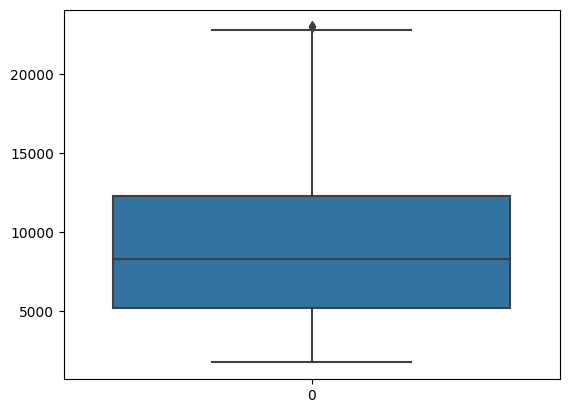

In [59]:
sns.boxplot(data=data['Price'])
plt.show()

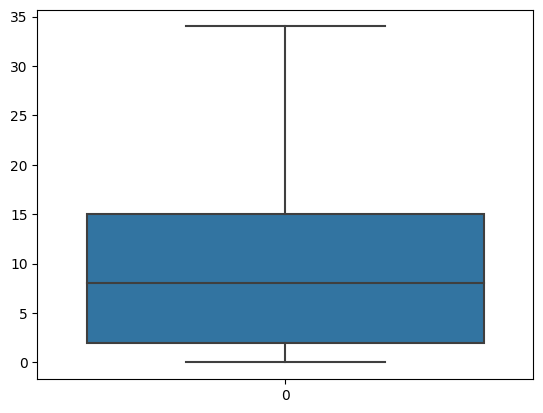

In [60]:
sns.boxplot(data=data['Duration_hrs'])
plt.show()

In [61]:
data.head()

,Total_Stops,Price,Journey_date,Journey_year,Journey_month,Duration_hrs,Duration_min,Dep_hr,Dep_min,Arrival_hr,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,2019,3,2,50,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,2019,5,7,25,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,2019,6,19,0,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,2019,5,5,25,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,2019,3,4,45,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [64]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
